<a href="https://colab.research.google.com/github/Seboldju/JS_JR_NK_Softwareentwicklung-Tankstellen/blob/main/Extended_Load_and_preprocess_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Select stations and time period 123


In [ ]:
id = "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7" # ID of the fuel station of interest (Aral Tankstelle Lochäckerstraße 294)
ids_pf = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]
days = 30 # Number of days of interest, counting backwards from today,
# above 200 days requires local engine or Colab Pro, runs out of memory in free version

# Install packages

In [ ]:
import datetime
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Load data

In [ ]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
print(yesterday)

2024-06-22


In [ ]:
twodaysago = today - datetime.timedelta(days=2)

In [ ]:
def linkFromDate(date) :
  link_prefix = "https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=/prices/"
  link_datepart = "2024/04/2024-04-23"
  link_datepart = date.strftime('%Y/%m/%Y-%m-%d')
  link_postfix = "-prices.csv"
  link = link_prefix + link_datepart + link_postfix
  return link

In [ ]:
link = linkFromDate(twodaysago)

In [ ]:
def downloadData(url) :
  command = ["wget", "-O","prices.csv",url]
  result = subprocess.run(command, capture_output=True, text=True)
  # Print the output from the command
  # print("Output:")
  # print(result.stdout)
  # Check for errors
  if result.stderr:
    print("Error:")
    print(result.stderr)

In [ ]:
raw_data = None
for i in range(days):
  day = today - datetime.timedelta(days=(days-i))
  # print(day)
  link = linkFromDate(day)
  try:
    downloadData(link)
    df = pd.read_csv("prices.csv")
    # df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S+02', , utc=True)
    df.date = pd.to_datetime(df.date, utc=True)
    if(raw_data is None) :
      raw_data = df
    else :
      raw_data = pd.concat([raw_data, df], ignore_index=True)
  except:
    print("Could not download or process " + link)
raw_data.describe()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 22950K .......... .......... .......... .......... .......... 22.2M
 23000K .......... .......... .......... .......... .......... 30.8M
 23050K .......... .......... .......... .......... .......... 31.0M
 23100K .......... .......... .......... .......... .......... 22.1M
 23150K .......... .......... .......... .......... .......... 27.1M
 23200K .......... .......... .......... .......... .......... 27.5M
 23250K .......... .......... .......... .......... .......... 28.7M
 23300K .......... .......... .......... .......... .......... 33.0M
 23350K .......... .......... .......... .......... .......... 27.8M
 23400K .......... .......... .......... .......... ..........  472K
 23450K .......... .......... .......... .......... .......... 45.5M
 23500K .......... .......... .......... .......... .......... 36.5M
 23550K .......... .......... .......... .......... .......... 29.5M
 23600K .......... .......... ......

,diesel,e5,e10,dieselchange,e5change,e10change
count,1.235102e+07,1.235102e+07,1.235102e+07,1.235102e+07,1.235102e+07,1.235102e+07
mean,1.643070e+00,1.801513e+00,1.695318e+00,7.828420e-01,7.743256e-01,7.518223e-01
std,5.539488e-02,2.308962e-01,3.605521e-01,4.125496e-01,4.182819e-01,4.322480e-01
min,-1.000000e-03,0.000000e+00,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.609000e+00,1.799000e+00,1.729000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.639000e+00,1.829000e+00,1.769000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.679000e+00,1.859000e+00,1.799000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,4.989000e+00,4.480000e+00,4.449000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [ ]:
raw_data.head(20)

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2024-05-23 22:01:55+00:00,44eb291f-06e6-4d55-8ad3-9d98ba21011f,1.639,1.819,1.759,1,1,1
1,2024-05-23 22:01:55+00:00,fee18acb-5b95-495c-be44-cc21a44c4b6b,1.649,1.859,1.799,1,1,1
2,2024-05-23 22:01:55+00:00,3793b323-9a75-47fb-acc1-4ee3ca765f9d,1.599,1.839,1.779,1,1,1
3,2024-05-23 22:01:55+00:00,6e564a07-7d39-4039-9c07-35b44642b270,1.649,1.869,1.809,1,0,0
4,2024-05-23 22:01:55+00:00,a30fba5d-ccbf-4609-a6a3-106dab6c7964,1.629,1.799,1.739,1,1,1
5,2024-05-23 22:01:55+00:00,fdf982fe-0b1a-4b86-9f0d-836217d446af,1.649,1.859,1.799,1,1,1
6,2024-05-23 22:01:55+00:00,ed6f7afb-4b5c-4c38-90b6-6f04e58b2124,1.629,1.789,1.749,1,1,1
7,2024-05-23 22:01:55+00:00,34c0c156-7eb2-4271-88e2-e7474dea15ca,1.649,1.849,1.789,1,1,1
8,2024-05-23 22:01:55+00:00,511b6975-e41b-499b-a770-7438aef5e791,1.609,1.769,1.719,1,0,0
9,2024-05-23 22:01:55+00:00,308733a3-f3a6-4259-a10a-8a8e08efa94e,1.629,0.000,0.000,1,0,0


# Data Cleansing and Preprocessing für die Clusteranalyse

**Datapreprocessing:**

* Filtern des Rohdatensatzes nach Pforzheimer Tankstellen
* Konvertieren der Spalte "date" in die richtige Zeitzone
* Abrunden der Sekunden auf volle Minuten
* Identifikation des Betrachtungszeitraums durch Festlegung des höchsten Datums im Datensatz als end_date und des niedrigsten Datums als start_date
* Erstellung eines neuen DataFrames mit einem Zeitstempel für jede Minute im betrachtungszeitraum
* erneute Spezifikationsmöglichkeit für IDs (falls für die CLusteranalyse nur bestimmte IDs betrachtet werden wollen)* Erweiterung des erstellten DataFrames durch eine Zeile mit jeder Minute für jede der Tankstellen in der ID-Liste
* Verbindung des neuen erweiterten DataFrame mit den ursprünglichen Preisänderungsdaten anhand der Merkmale 'station_uuid' und 'date'
* Auffüllen der leeren Zeilen mit dem letzten bekannten Preis durch den ffill. Hierbei wurde darauf geachtet, dass die Preisänderungsspalten (diesel_change, e10_change, e5_change) nicht aufgefüllt werden, sondern leer bleiben, damit man die ursprünglichen und aufgefüllten Daten im Datensatz unterscheiden kann und die Spaltensumme weiterhin der Anzahl der Änderungen entspricht.
* Anschließend wurde der geupdatete Datensatz mit Originaldaten von Tankerkönig.de abgeglichen, wodurch die Korrektheit der Daten bestätigt werden konnte



In [ ]:
import pandas as pd

# Filtern des Datensatzes nach den IDs in ids_pf
data_cluster = raw_data[raw_data['station_uuid'].isin(ids_pf)]
data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')

# Runden der Sekunden auf volle Minuten
data_cluster['date'] = data_cluster['date'].dt.floor('T')

# Definiere den Zeitraum
start_date = data_cluster['date'].min().floor('D')
end_date = data_cluster['date'].max().ceil('D')

# Erstelle einen DataFrame mit einem Zeitstempel für jede Minute im betrachteten Zeitraum
all_minutes = pd.date_range(start=start_date, end=end_date, freq='T', tz='Europe/Berlin')
all_minutes_df = pd.DataFrame(all_minutes, columns=['date'])

# Liste der spezifischen Tankstellen-IDs
station_ids = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]

# Erstelle einen DataFrame mit einer Zeile für jede Minute und jede dieser spezifischen Tankstellen
expanded_df = pd.concat([all_minutes_df.assign(station_uuid=station_id) for station_id in station_ids], ignore_index=True)

# Merge der erweiterten Daten mit den Preisänderungsdaten
merged_df = pd.merge(expanded_df, data_cluster, on=['date', 'station_uuid'], how='left')

# Definiere die Spalten, die gefüllt werden sollen
price_columns = ['diesel', 'e5', 'e10']

# Gruppiere nach Tankstellen-ID und fülle die fehlenden Werte auf, ohne die Änderungs-Spalten zu beeinflussen
for station_id in station_ids:
    station_data = merged_df[merged_df['station_uuid'] == station_id].copy()
    station_data[price_columns] = station_data[price_columns].fillna(method='ffill').fillna(0)

    # Update nur die Preis-Spalten im ursprünglichen DataFrame
    merged_df.loc[merged_df['station_uuid'] == station_id, price_columns] = station_data[price_columns]

# Zeige die ersten paar Zeilen des aufgefüllten DataFrames
print(merged_df.head())


<ipython-input-14-de3b8acc4367>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')
<ipython-input-14-de3b8acc4367>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = data_cluster['date'].dt.floor('T')


                       date                          station_uuid  diesel  \
0 2024-05-24 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-24 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-24 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-24 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-24 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  
0  0.0  0.0           NaN       NaN        NaN  
1  0.0  0.0           NaN       NaN        NaN  
2  0.0  0.0           NaN       NaN        NaN  
3  0.0  0.0           NaN       NaN        NaN  
4  0.0  0.0           NaN       NaN        NaN  


**Extraktion von Stunde, Wochentag und Minute als neue Spalten**

Stunde, Wochentag und Minute werden aus der konvertierte 'date'-Spalte extrahiert, was spätere Gruppierungen erleichtern soll.

In [ ]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
merged_df['hour'] = merged_df['date'].dt.hour
merged_df['weekday'] = merged_df['date'].dt.weekday
merged_df['minute'] = merged_df['date'].dt.minute

print(merged_df.head())

                       date                          station_uuid  diesel  \
0 2024-05-24 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-24 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-24 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-24 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-24 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  hour  weekday  minute  
0  0.0  0.0           NaN       NaN        NaN     0        4       0  
1  0.0  0.0           NaN       NaN        NaN     0        4       1  
2  0.0  0.0           NaN       NaN        NaN     0        4       2  
3  0.0  0.0           NaN       NaN        NaN     0        4       3  
4  0.0  0.0           NaN       NaN        NaN     0        4       4  


**Umbenennung der Tankstellen in der uu_id-Spalte...**

...in den Klarnamen der Tankstelle, zur besseren Lesbarkeit

In [ ]:
# Mapping der Station UUIDs zu den neuen Namen
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Ersetzen der station_uuid durch die neuen Namen
merged_df['station_uuid'] = merged_df['station_uuid'].map(station_names).fillna(merged_df['station_uuid'])

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Anzeigen der ersten paar Zeilen des DataFrames zur Überprüfung
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-24 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-24 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-24 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-24 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-24 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-22 23:56:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864016 2024-06-22 23:57:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864017 2024-06-22 23:58:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864018 2024-06-22 23:59:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864019 2024-06-23 00:00:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   

        dieselchange  e5cha

**Validierung der Daten**

Der neu erstellte Datensatz wurde als CSV-Datei exportiert und mit Daten von Tankerkönig.de abgeglichen.

In [ ]:
from google.colab import files
features_df.to_csv('Alle Berechnungen Cluster.csv', index=True)
files.download('Alle Berechnungen Cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Ergänzung weiterer Spalten zum DataFrame, für die anschließenden Berechnungen

Zunächst hinzufügen von neuen Spalten, welche die absolute Preisänderungen der Kraftstoffe für jede Zeile ausgeben

In [ ]:
# Berechnung der Preisänderungen
merged_df['diesel_change_value'] = merged_df.groupby('station_uuid')['diesel'].diff()
merged_df['e5_change_value'] = merged_df.groupby('station_uuid')['e5'].diff()
merged_df['e10_change_value'] = merged_df.groupby('station_uuid')['e10'].diff()

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-24 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-24 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-24 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-24 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-24 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-22 23:56:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864016 2024-06-22 23:57:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864017 2024-06-22 23:58:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864018 2024-06-22 23:59:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864019 2024-06-23 00:00:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   

        dieselchange  e5cha

Hinzufügen der Zeit seit der letzten Preisänderung für jede Kraftstoffart

In [ ]:
# Sicherstellen, dass das Datum als Datetime-Objekt vorliegt
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Berechnung der Zeitdifferenz zu den Zeitstempeln, an denen eine Preisänderung stattgefunden hat
def calculate_time_diff(df, price_change_col):
    # Zeitdifferenz nur zu den Zeilen mit Preisänderungen berechnen
    df['change_time'] = df['date'].where(df[price_change_col] == 1)
    df['change_time'] = df['change_time'].fillna(method='ffill')
    time_diff = (df['date'] - df['change_time']).dt.total_seconds() / 60  # in Minuten
    return time_diff

# Berechnung der Zeitdifferenzen für Diesel, E5 und E10
merged_df['time_since_last_change_diesel'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'dieselchange')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e5'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e5change')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e10'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e10change')).reset_index(level=0, drop=True)

# Entfernen der temporären Spalte 'change_time'
merged_df.drop(columns=['change_time'], inplace=True, errors='ignore')

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-24 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-24 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-24 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-24 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-24 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  minute  \
0           NaN       NaN        NaN     0        4       0   
1           NaN       NaN        NaN     0        4       1   
2           NaN       NaN        NaN     0        4       2   
3           NaN       NaN        NaN     0        4       3   
4           NaN       NaN        NaN     0        4       4   

   diesel_change_value  e5_change_value  e10_change_value  \
0                  NaN              NaN               NaN   
1                  NaN              NaN               NaN   
2          

Hinzufügen von Spalten, die Angeben, ob der Kraftstoffpreis gestiegen oder gesunken ist, um daraus das Verhältnis von Preissenkungen zu Preiserhöhungen zu berechnen

In [ ]:
# Anzeigen ob der Kraftstoffpreis steigt oder fällt, für die Berechnung des Verhältnisses von Preissenkungen zu Preiserhöhungen
merged_df['diesel_increase'] = (merged_df['diesel_change_value'] > 0).astype(int)
merged_df['diesel_decrease'] = (merged_df['diesel_change_value'] < 0).astype(int)

merged_df['e5_increase'] = (merged_df['e5_change_value'] > 0).astype(int)
merged_df['e5_decrease'] = (merged_df['e5_change_value'] < 0).astype(int)

merged_df['e10_increase'] = (merged_df['e10_change_value'] > 0).astype(int)
merged_df['e10_decrease'] = (merged_df['e10_change_value'] < 0).astype(int)

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-24 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-24 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-24 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-24 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-24 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  ...  e10_change_value  \
0           NaN       NaN        NaN     0        4  ...               NaN   
1           NaN       NaN        NaN     0        4  ...               NaN   
2           NaN       NaN        NaN     0        4  ...               NaN   
3           NaN       NaN        NaN     0        4  ...               NaN   
4           NaN       NaN        NaN     0        4  ...               NaN   

   time_since_last_change_diesel  time_since_last_change_e5  \
0                            NaN         

# Berechnungen der Metriken für die Clusteranalyse

**Berechnung der Häufigkeit der Preisänderungen pro Tag**

Diese Metrik gibt uns Auskunft darüber, wie oft eine Tankstelle im Durchschnitt ihre Preise pro Tag ändert

In [ ]:
# Berechnung der Häufigkeit der Preisänderungen pro Tag für Diesel, E5 und E10
merged_df['date_only'] = merged_df['date'].dt.date

price_change_frequency_diesel = merged_df[merged_df['dieselchange'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e5 = merged_df[merged_df['e5change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e10 = merged_df[merged_df['e10change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()

price_change_frequency_df = pd.DataFrame({
    'price_change_frequency_diesel': price_change_frequency_diesel,
    'price_change_frequency_e5': price_change_frequency_e5,
    'price_change_frequency_e10': price_change_frequency_e10
})
price_change_frequency_df = price_change_frequency_df.add_suffix('_avg_number_of_changes_per_day')
print(price_change_frequency_df.head())

                      price_change_frequency_diesel_avg_number_of_changes_per_day  \
station_uuid                                                                        
Access_Calwer                                                 20.666667             
Aral_Armsel                                                   21.766667             
Aral_KaiserFriedrich                                          18.133333             
Aral_Karlsruher                                               25.066667             
Aral_Lochaecker                                               23.166667             

                      price_change_frequency_e5_avg_number_of_changes_per_day  \
station_uuid                                                                    
Access_Calwer                                                 20.300000         
Aral_Armsel                                                   23.500000         
Aral_KaiserFriedrich                                          20.733333         

**Berechnung der durchschnittlichen Dauer zwischen Preisänderungen**

Diese Metrik zeigt uns, wie viele Minuten es im Durchschnitt dauert, bis eine Tankstelle ihre Preise ändert

In [ ]:
# Durchschnittliche Dauer zwischen Preisänderungen berechnen
average_time_between_changes_diesel = merged_df.groupby('station_uuid')['time_since_last_change_diesel'].mean()
average_time_between_changes_e5 = merged_df.groupby('station_uuid')['time_since_last_change_e5'].mean()
average_time_between_changes_e10 = merged_df.groupby('station_uuid')['time_since_last_change_e10'].mean()

average_time_between_changes_df = pd.DataFrame({
    'average_time_between_changes_diesel': average_time_between_changes_diesel,
    'average_time_between_changes_e5': average_time_between_changes_e5,
    'average_time_between_changes_e10': average_time_between_changes_e10
})

average_time_between_changes_df = average_time_between_changes_df.add_suffix('_in_minutes')

print(average_time_between_changes_df.head())


                      average_time_between_changes_diesel_in_minutes  \
station_uuid                                                           
Access_Calwer                                             136.801317   
Aral_Armsel                                                93.816321   
Aral_KaiserFriedrich                                       92.131582   
Aral_Karlsruher                                            76.991445   
Aral_Lochaecker                                            91.907555   

                      average_time_between_changes_e5_in_minutes  \
station_uuid                                                       
Access_Calwer                                         136.624624   
Aral_Armsel                                            90.594788   
Aral_KaiserFriedrich                                   88.877835   
Aral_Karlsruher                                        74.740216   
Aral_Lochaecker                                        91.972145   

                  

**Berechnung des prozentualen Anteils der Preiserhöhungen und -senkungen**

Diese Metrik gibt uns Einblicke, wie hoch der Anteil der Preissenkungen/Preissteigerungen an der Gesamtzahl der Preisänderungen für eine Tankstelle ist.

In [ ]:
# Berechnung des Anteils der Preiserhöhungen und -senkungen
total_price_changes_diesel = merged_df.groupby('station_uuid')['dieselchange'].sum()
total_price_changes_e5 = merged_df.groupby('station_uuid')['e5change'].sum()
total_price_changes_e10 = merged_df.groupby('station_uuid')['e10change'].sum()

price_increase_percentage_diesel = merged_df.groupby('station_uuid')['diesel_increase'].sum() / total_price_changes_diesel
price_decrease_percentage_diesel = merged_df.groupby('station_uuid')['diesel_decrease'].sum() / total_price_changes_diesel

price_increase_percentage_e5 = merged_df.groupby('station_uuid')['e5_increase'].sum() / total_price_changes_e5
price_decrease_percentage_e5 = merged_df.groupby('station_uuid')['e5_decrease'].sum() / total_price_changes_e5

price_increase_percentage_e10 = merged_df.groupby('station_uuid')['e10_increase'].sum() / total_price_changes_e10
price_decrease_percentage_e10 = merged_df.groupby('station_uuid')['e10_decrease'].sum() / total_price_changes_e10

price_change_percentage_df = pd.DataFrame({
    'price_increase_percentage_diesel': price_increase_percentage_diesel,
    'price_decrease_percentage_diesel': price_decrease_percentage_diesel,
    'price_increase_percentage_e5': price_increase_percentage_e5,
    'price_decrease_percentage_e5': price_decrease_percentage_e5,
    'price_increase_percentage_e10': price_increase_percentage_e10,
    'price_decrease_percentage_e10': price_decrease_percentage_e10
})

print(price_change_percentage_df.head())


                      price_increase_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.367742   
Aral_Armsel                                   0.366003   
Aral_KaiserFriedrich                          0.439338   
Aral_Karlsruher                               0.317819   
Aral_Lochaecker                               0.338129   

                      price_decrease_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.630645   
Aral_Armsel                                   0.632466   
Aral_KaiserFriedrich                          0.558824   
Aral_Karlsruher                               0.680851   
Aral_Lochaecker                               0.660432   

                      price_increase_percentage_e5  \
station_uuid                                         
Access_Calwer                             0.377668   
Aral_Armsel             

**Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp (Erhöhung vs. Senkung)**

Diese Metrik zeigt uns die durchschnittliche Höhe der Preisänderungen in Euro bei Erhöhungen und Senkungen

In [ ]:
# Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp
average_increase_amount_diesel = merged_df[merged_df['diesel_increase'] == 1].groupby('station_uuid')['diesel_change_value'].mean()
average_decrease_amount_diesel = merged_df[merged_df['diesel_decrease'] == 1].groupby('station_uuid')['diesel_change_value'].mean()

average_increase_amount_e5 = merged_df[merged_df['e5_increase'] == 1].groupby('station_uuid')['e5_change_value'].mean()
average_decrease_amount_e5 = merged_df[merged_df['e5_decrease'] == 1].groupby('station_uuid')['e5_change_value'].mean()

average_increase_amount_e10 = merged_df[merged_df['e10_increase'] == 1].groupby('station_uuid')['e10_change_value'].mean()
average_decrease_amount_e10 = merged_df[merged_df['e10_decrease'] == 1].groupby('station_uuid')['e10_change_value'].mean()

average_change_amount_df = pd.DataFrame({
    'average_increase_amount_diesel': average_increase_amount_diesel,
    'average_decrease_amount_diesel': average_decrease_amount_diesel,
    'average_increase_amount_e5': average_increase_amount_e5,
    'average_decrease_amount_e5': average_decrease_amount_e5,
    'average_increase_amount_e10': average_increase_amount_e10,
    'average_decrease_amount_e10': average_decrease_amount_e10
})

average_change_amount_df = average_change_amount_df.add_suffix('_in_Euro')

print(average_change_amount_df.head())


                      average_increase_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                       0.044561   
Aral_Armsel                                         0.056360   
Aral_KaiserFriedrich                                0.056527   
Aral_Karlsruher                                     0.055941   
Aral_Lochaecker                                     0.059064   

                      average_decrease_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                      -0.025908   
Aral_Armsel                                        -0.032809   
Aral_KaiserFriedrich                               -0.044474   
Aral_Karlsruher                                    -0.026230   
Aral_Lochaecker                                    -0.030240   

                      average_increase_amount_e5_in_Euro  \
station_uuid                              

**Erstellen von weiteren Berechnungen**

Für die Clusteranalyse wurden folgende weitere Berechnungen für jede Tankstelle und Kraftstoffart durchgeführt, um zusammen mit den bisherigen Berechnungen erste Rückschlüsse auf die Preisstrategie  ziehen zu können (Allgemeines Preisniveau, Preisniveau nach Tageszeiten, Preisschwankungen, Extremwerte etc.):

* Durchschnittspreise nach Stunde
* Durchschnittspreise nach Wochentag
* Minimalpreis nach Stunde
* Minimalpreis nach Wochentag
* Maximalpreis nach Stunde
* Maximalpreis nach Wochentag
* Standardabweichung
* Anzahl der Preisänderungen



In [ ]:
# Entfernen der nicht-numerischen Spalten vor der Gruppierung
price_columns = ['diesel', 'e5', 'e10']
change_columns = ['dieselchange', 'e10change', 'e5change']

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Durchschnittspreise nach Stunde und Wochentag
avg_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].mean().unstack().add_suffix('_avg_price_by_hour_in_Euro')
avg_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].mean().unstack().add_suffix('_avg_price_by_weekday_in_Euro')

min_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].min().unstack().add_suffix('_min_price_by_hour_in_Euro')
max_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].max().unstack().add_suffix('_max_price_by_hour_in_Euro')
min_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].min().unstack().add_suffix('_min_price_by_weekday_in_Euro')
max_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].max().unstack().add_suffix('_max_price_by_weekday_in_Euro')

std_price = merged_df.groupby('station_uuid')[price_columns].std().add_suffix('_std_in_Euro')
price_changes = merged_df.groupby('station_uuid')[change_columns].sum().add_suffix('_total_num_changes')


**Hinzufügen von Metriken, welche das Preisverhalten in Stoßzeiten (Berufsverkehr) untersuchen**


Diese Analyse von Stoßzeiten soll zusätzliche Einblicke in die Preisstrategien der Tankstellen bieten, insbesondere zu Zeiten, in denen die Nachfrage möglicherweise höher ist.

Wir unterteilen den Tag in mehrere Abschnitte und berechnen Metriken speziell für diese Abschnitte. Typische Stoßzeiten könnten zum Beispiel die folgenden sein:

Morgens (Berufsverkehr): 6:00 - 9:00 Uhr
Mittags: 11:00 - 14:00 Uhr
Abends (Berufsverkehr): 16:00 - 19:00 Uhr

Metriken während Stoßzeiten:
* Durchschnittliche Preise während der Stoßzeiten
* Anzahl der Preisänderungen während der Stoßzeiten



In [ ]:
import pandas as pd
import numpy as np

# Definieren der Stoßzeiten
rush_hours = {
    'morning': (6, 9),
    'midday': (11, 14),
    'evening': (16, 19)
}

# Funktion zur Berechnung der Metriken während Stoßzeiten
def calculate_rush_hour_metrics(df, rush_hours, price_columns, change_columns):
    rush_hour_metrics = {}

    for period, (start_hour, end_hour) in rush_hours.items():
        period_df = df[(df['hour'] >= start_hour) & (df['hour'] < end_hour)]

        avg_prices = period_df.groupby('station_uuid')[price_columns].mean().add_suffix(f'_{period}_avg_price_in_Euro')
        num_changes = period_df.groupby('station_uuid')[change_columns].sum().add_suffix(f'_{period}_num_changes')

        rush_hour_metrics[period] = avg_prices.join(num_changes)

    return pd.concat(rush_hour_metrics.values(), axis=1)

# Berechnung der Metriken während Stoßzeiten
rush_hour_metrics_df = calculate_rush_hour_metrics(merged_df, rush_hours, price_columns, change_columns)

print(rush_hour_metrics_df.head())


                      diesel_morning_avg_price_in_Euro  \
station_uuid                                             
Access_Calwer                                 1.640953   
Aral_Armsel                                   1.659522   
Aral_KaiserFriedrich                          1.675278   
Aral_Karlsruher                               1.680181   
Aral_Lochaecker                               1.680231   

                      e5_morning_avg_price_in_Euro  \
station_uuid                                         
Access_Calwer                             1.816146   
Aral_Armsel                               1.842543   
Aral_KaiserFriedrich                      1.847317   
Aral_Karlsruher                           1.849669   
Aral_Lochaecker                           1.852946   

                      e10_morning_avg_price_in_Euro  \
station_uuid                                          
Access_Calwer                              1.756146   
Aral_Armsel                                1.7825

**Zusammenführen aller Metriken in einem DataFrame**

In [ ]:
# Zusammenführen aller berechneten Metriken in einem DataFrame
features_df = avg_price_by_hour.join([
    avg_price_by_weekday, min_price_by_hour, max_price_by_hour,
    min_price_by_weekday, max_price_by_weekday, std_price, price_changes,
    price_change_frequency_df, average_time_between_changes_df,
    price_change_percentage_df, average_change_amount_df,
    rush_hour_metrics_df
])

print(features_df.head())

                      (diesel_avg_price_by_hour_in_Euro, 0_avg_price_by_hour_in_Euro)  \
station_uuid                                                                            
Access_Calwer                                                  1.603509                 
Aral_Armsel                                                    1.612452                 
Aral_KaiserFriedrich                                           1.659362                 
Aral_Karlsruher                                                1.626938                 
Aral_Lochaecker                                                1.655577                 

                      (diesel_avg_price_by_hour_in_Euro, 1_avg_price_by_hour_in_Euro)  \
station_uuid                                                                            
Access_Calwer                                                  1.603483                 
Aral_Armsel                                                    1.612448                 
Aral_KaiserFriedrich

# Vorbereitung der Clusteranalyse (Normalisierung & Bestimmung der Clusterzahl)

**Normalisierung der Daten**

Aufgrund eines Fehler, der besagte dass die Spaltennamen Strings sein müssen, wurden diese konvertiert.

Anschließend wurden die Daten normalisiert, um sie für die Clusternalyse nutzen zu können.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Konvertieren der Spaltennamen in Strings
features_df.columns = features_df.columns.map(str)

# Normalisierung der Daten
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Erstellen eines DataFrames aus den skalierten Daten
features_scaled_df = pd.DataFrame(features_scaled, index=features_df.index, columns=features_df.columns)

# Zeige die ersten paar Zeilen des skalierten DataFrames
print(features_scaled_df.head())



                      ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
station_uuid                                                                                
Access_Calwer                                                 -0.077446                     
Aral_Armsel                                                    0.135599                     
Aral_KaiserFriedrich                                           1.253095                     
Aral_Karlsruher                                                0.480686                     
Aral_Lochaecker                                                1.162924                     

                      ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
station_uuid                                                                                
Access_Calwer                                                 -0.070379                     
Aral_Armsel                                                    0.1417

**Bestimmung der optimalen Anzahl der Cluster mittels Elbow-Methode**

Der Elbow-Plot zeigt, dass sich die Kurve bei etwa 3 oder 4 Clustern zu stabilisieren beginnt. Das bedeutet, dass die optimale Anzahl der Cluster wahrscheinlich 3 oder 4 ist. Es ist klar, dass der größte Unterschied in der WCSS zwischen 1 und 3 Clustern liegt, danach nimmt der Nutzen ab.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

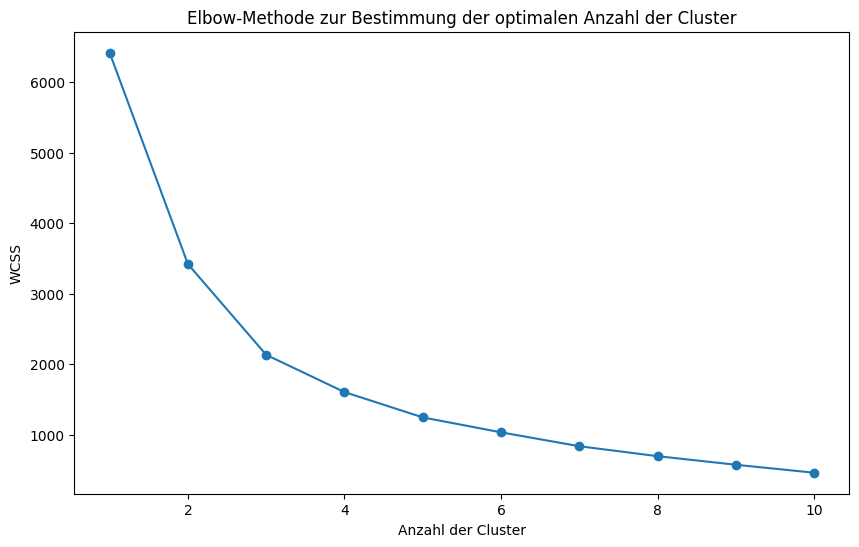

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Bestimmung der optimalen Anzahl der Cluster mit der Elbow-Methode
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot der Elbow-Methode
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Anzahl der Cluster')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS')
plt.show()


# Durchführung, Weiterverarbeitung und Visualisierung der Clusteranalyse

**Durchführung der Clusteranalyse**

Die Clusteranalyse wurde mithilfe von kmeans durchgeführt. Als optimale Clusterzahl wurde gemäß der Elbow-Methode 3 gewählt.

In [ ]:
# K-Means Analyse durchführen
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_df)
cluster_centers = kmeans.cluster_centers_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Berechnung der Clusterzentren zur Interpretation**

In [ ]:
# Erstellen eines DataFrames mit den Cluster-Zentroiden
centroids_df = pd.DataFrame(cluster_centers, columns=features_df.columns)
centroids_df.index = [f'Cluster {i}' for i in range(3)]

In [ ]:
# Transponieren des DataFrames, sodass die Metriken in den Zeilen und die Cluster in den Spalten stehen
centroids_transposed_df = centroids_df.transpose()

from google.colab import files

# Export des DataFrames als CSV mit Index
centroids_transposed_df.to_csv('Clusterzentren.csv', index=True)
files.download('Clusterzentren.csv')

print(centroids_transposed_df.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                                    Cluster 0  Cluster 1  \
('diesel_avg_price_by_hour_in_Euro', '0_avg_pri...   1.604707   1.613879   
('diesel_avg_price_by_hour_in_Euro', '1_avg_pri...   1.604690   1.613343   
('diesel_avg_price_by_hour_in_Euro', '2_avg_pri...   1.604690   1.611444   
('diesel_avg_price_by_hour_in_Euro', '3_avg_pri...   1.604690   1.611444   
('diesel_avg_price_by_hour_in_Euro', '4_avg_pri...   1.604666   1.611444   

                                                    Cluster 2  
('diesel_avg_price_by_hour_in_Euro', '0_avg_pri...   1.544876  
('diesel_avg_price_by_hour_in_Euro', '1_avg_pri...   1.544862  
('diesel_avg_price_by_hour_in_Euro', '2_avg_pri...   1.544862  
('diesel_avg_price_by_hour_in_Euro', '3_avg_pri...   1.544862  
('diesel_avg_price_by_hour_in_Euro', '4_avg_pri...   1.544862  


In [ ]:
print(centroids_df)

           ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
Cluster 0                                           1.604707                     
Cluster 1                                           1.613879                     
Cluster 2                                           1.544876                     

           ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
Cluster 0                                           1.604690                     
Cluster 1                                           1.613343                     
Cluster 2                                           1.544862                     

           ('diesel_avg_price_by_hour_in_Euro', '2_avg_price_by_hour_in_Euro')  \
Cluster 0                                           1.604690                     
Cluster 1                                           1.611444                     
Cluster 2                                           1.544862                     

           ('

Beschreibung und Interpretation:


# Vorbereitung der Visualisierung

Erstellen eines neuen Dataframe mit den Clusterzentren der Tankstellen

In [ ]:
# Erstellen eines DataFrames mit den Cluster-Zuweisungen
cluster_assignments = pd.DataFrame({
    'station_uuid': features_df.index,
    'cluster': labels
})

# Überprüfung der Cluster-Zuweisungen
print(cluster_assignments.head())


           station_uuid  cluster
0         Access_Calwer        1
1           Aral_Armsel        1
2  Aral_KaiserFriedrich        1
3       Aral_Karlsruher        1
4       Aral_Lochaecker        1


Erstellen eines neuen Dataframes "merges_with_cluster" aus dem ursprünglichen DataFrame und den Clusterzuweisungen

In [60]:
# Zusammenführen der Cluster-Zuweisungen mit den Originaldaten
merged_with_clusters = pd.merge(merged_df, cluster_assignments, on='station_uuid', how='left')

# Überprüfung der zusammengeführten Daten
print(merged_with_clusters)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-24 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-24 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-24 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-24 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-24 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-22 23:56:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864016 2024-06-22 23:57:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864017 2024-06-22 23:58:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864018 2024-06-22 23:59:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   
864019 2024-06-23 00:00:00+02:00        Aral_Lochaecker   1.699  1.859  1.799   

        dieselchange  e5cha

# Visualisierungen und Beschreibungen der Cluster

**Durchschnittlicher Preis nach Stunde für jedes Cluster**



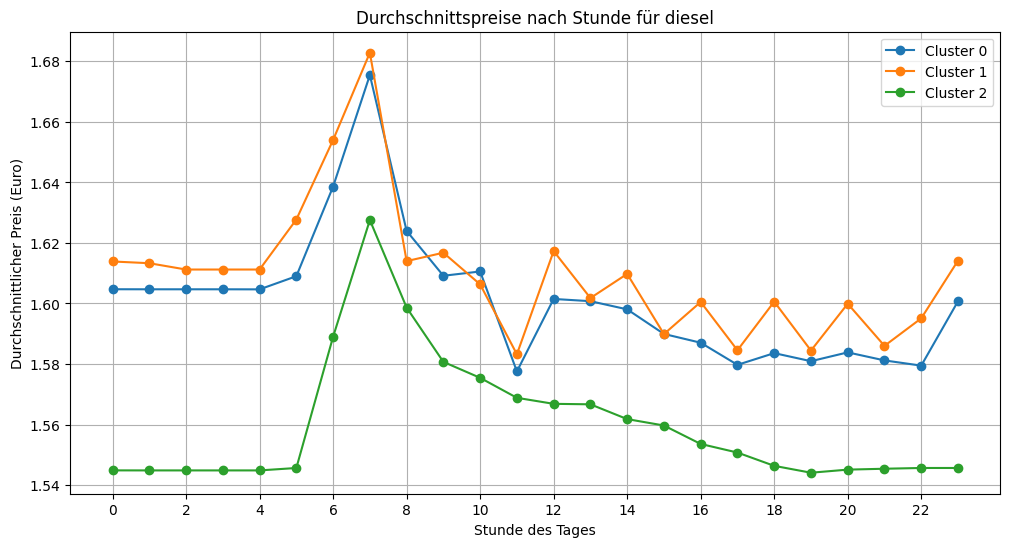

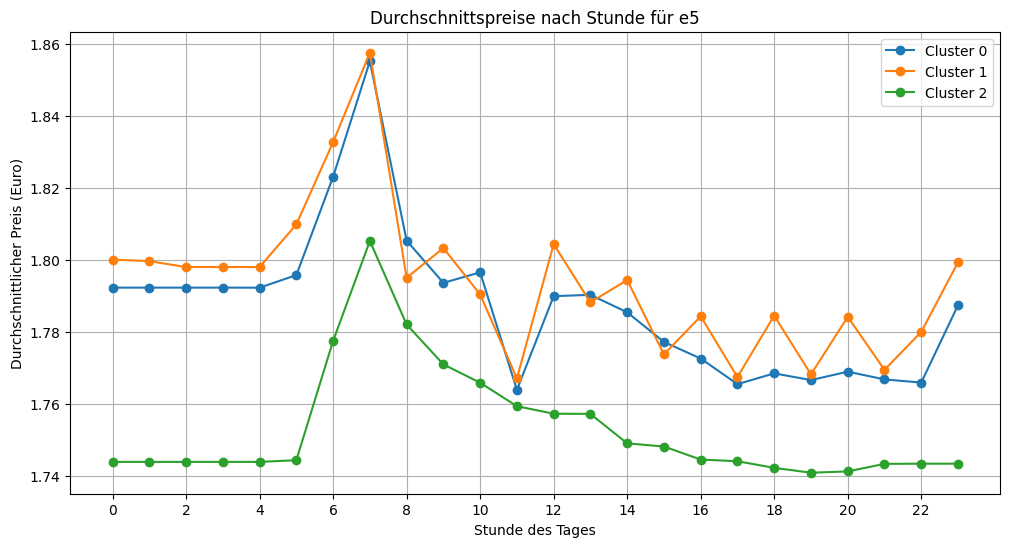

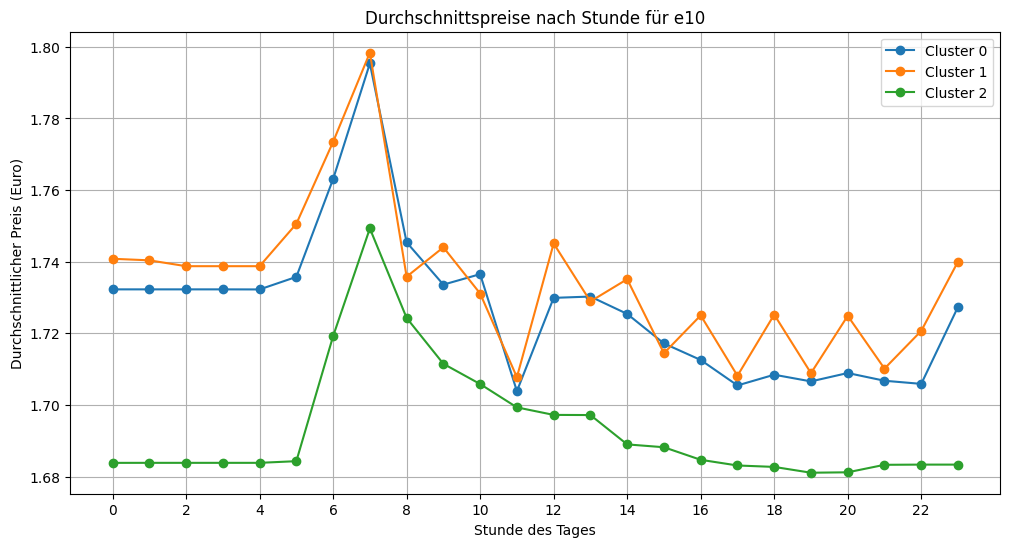

In [ ]:
# Berechnung der durchschnittlichen Preise nach Stunde und Cluster
avg_price_by_hour_cluster = merged_with_clusters.groupby(['cluster', 'hour'])[price_columns].mean().reset_index()

# Visualisierung der durchschnittlichen Preise nach Stunde für Diesel, E5 und E10 in jedem Cluster

for fuel in price_columns:
    plt.figure(figsize=(12, 6))
    for cluster in avg_price_by_hour_cluster['cluster'].unique():
        cluster_data = avg_price_by_hour_cluster[avg_price_by_hour_cluster['cluster'] == cluster]
        plt.plot(cluster_data['hour'], cluster_data[fuel], marker='o', label=f'Cluster {cluster}')

    plt.title(f'Durchschnittspreise nach Stunde für {fuel}')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Durchschnittlicher Preis (Euro)')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(0, 24, 2))  # Zeigt jede zweite Stunde auf der x-Achse
    plt.show()





Beschreibung der Diagramme: Durchschnittspreise nach Stunde für Diesel, E5 und E10

Die Diagramme zeigen die durchschnittlichen Preise für Diesel, E5 und E10 im Verlauf eines Tages (0 bis 23 Uhr) für die drei identifizierten Cluster.

**Cluster 0 (Blaue Linie)**

Stabilität: Beginnt relativ stabil in der Nacht und frühen Morgenstunden bis etwa 6 Uhr.

Morgenpeak: Ein leichter Anstieg ab 5 Uhr, der seinen Höhepunkt um 7 Uhr erreicht.

Abfall und Stabilität: Nach dem Morgenpeak sinkt der Preis und bleibt den restlichen Tag über relativ konstant, mit leichten Schwankungen gegen Abend.

**Cluster 1 (Orange Linie)**

Stabilität: Beginnt stabil, aber auf einem höheren Niveau als Cluster 0.

Aggressiver Morgenpeak: Ein dramatischer Preisanstieg ab etwa 5 Uhr, der seinen Höhepunkt um 7 Uhr erreicht.

Volatilität: Stärkere Schwankungen im Tagesverlauf nach dem Peak, bleibt jedoch insgesamt auf einem höheren Preisniveau.

**Cluster 2 (Grüne Linie)**

Niedrigpreisstrategie: Beginnt auf dem niedrigsten Niveau und bleibt in der Nacht stabil.

Moderater Morgenpeak: Ein abruptes Ansteigen ab 5 Uhr, erreicht jedoch einen niedrigeren Höhepunkt als Cluster 1.

Kontinuierlicher Preisrückgang: Der Preis sinkt nach dem Morgenpeak kontinuierlich und bleibt den restlichen Tag über auf dem niedrigsten Niveau.

**Interpretation der Preisstrategien**

**Cluster 0**

Stabilität und moderate Anpassung

Strategie: Konservative Preisstrategie mit Fokus auf Stabilität.

Morgenpeak: Moderate Preisanpassung, um die erhöhte Nachfrage während des Berufsverkehrs zu nutzen.

Rest des Tages: Nach dem Peak bleibt der Preis stabil mit leichten Schwankungen, was auf eine vorsichtige Anpassung an Marktveränderungen hinweist.

**Cluster 1**

Aggressive Preisanpassung

Strategie: Aggressive Preisanpassung zur Maximierung der Einnahmen während der Stoßzeiten.

Morgenpeak: Deutlicher Preisanstieg ab 5 Uhr, Höhepunkt um 7 Uhr, deutet auf eine aggressive Nutzung der erhöhten Nachfrage hin.

Volatilität: Nach dem Peak zeigt der Preis stärkere Schwankungen, was auf eine flexible und reaktive Preisstrategie hinweist.

**Cluster 2**

Niedrigpreisstrategie

Strategie: Preisunterbietung zur Gewinnung von Marktanteilen.

Morgenpeak: Ein moderater Preisanstieg ab 5 Uhr, der jedoch niedriger bleibt als bei Cluster 1.

Kontinuierlicher Preisrückgang: Der Preis sinkt nach dem Morgenpeak kontinuierlich, was auf eine Strategie der konstanten Niedrigpreise hinweist.
Unterschiede zwischen den Kraftstoffarten
Ähnlichkeiten

**Schlussfolgerungen und Empfehlungen**

**Cluster 0:** Diese Tankstellen sollten ihre Strategie der Preisstabilität weiterführen, könnten jedoch gezielte Preisanpassungen während der Stoßzeiten nutzen, um die Nachfrage besser zu nutzen.

**Cluster 1:** Diese Tankstellen sollten ihre aggressive Preisanpassungsstrategie beibehalten, könnten jedoch eine detailliertere Analyse der Marktreaktionen durchführen, um die Effizienz der Preisanpassungen zu maximieren.

**Cluster 2:** Diese Tankstellen sollten ihre Niedrigpreisstrategie weiterführen und zusätzliche Marketingmaßnahmen einsetzen, um die Wahrnehmung der niedrigen Preise zu verbessern und die Kundenbindung zu stärken.

**Durchschnittspreise nach Wochentag**

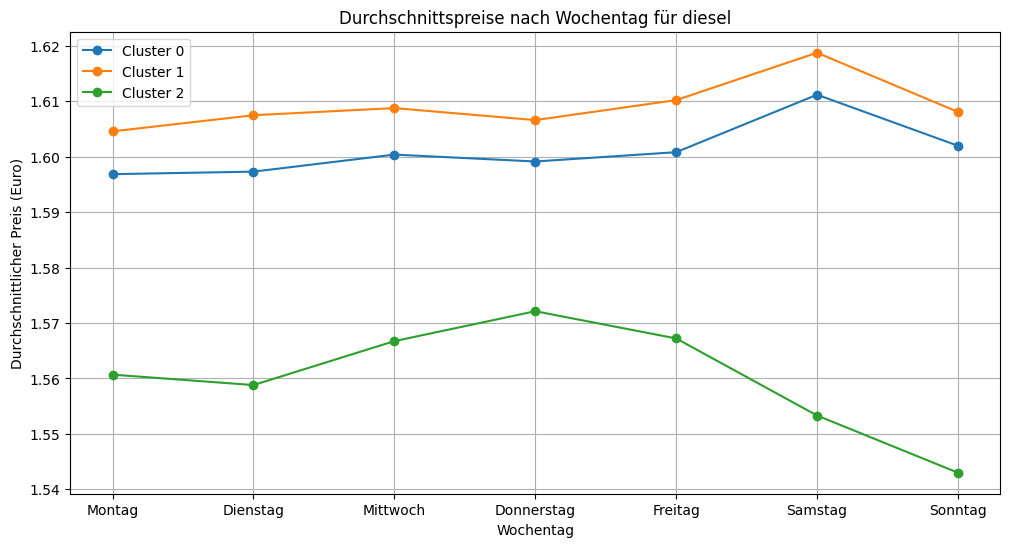

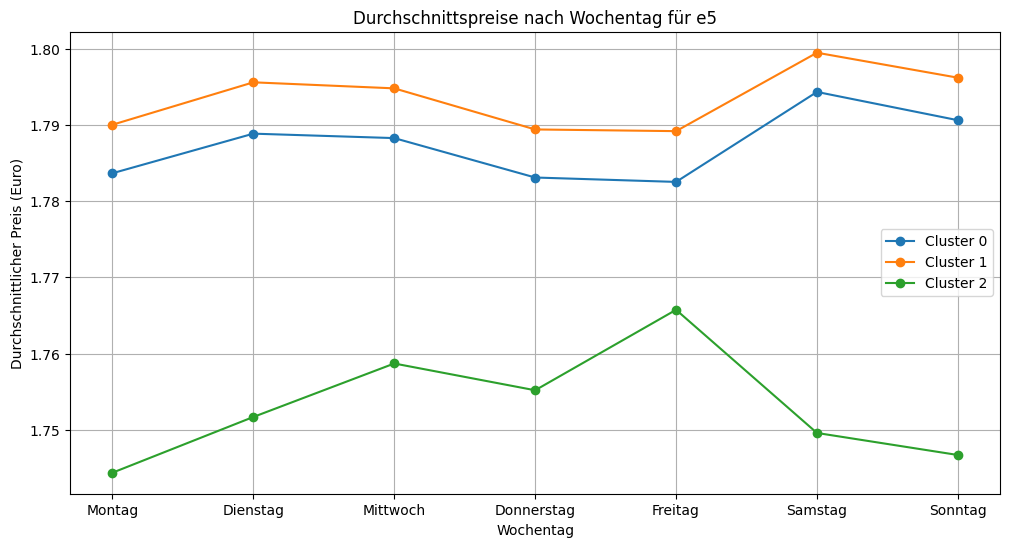

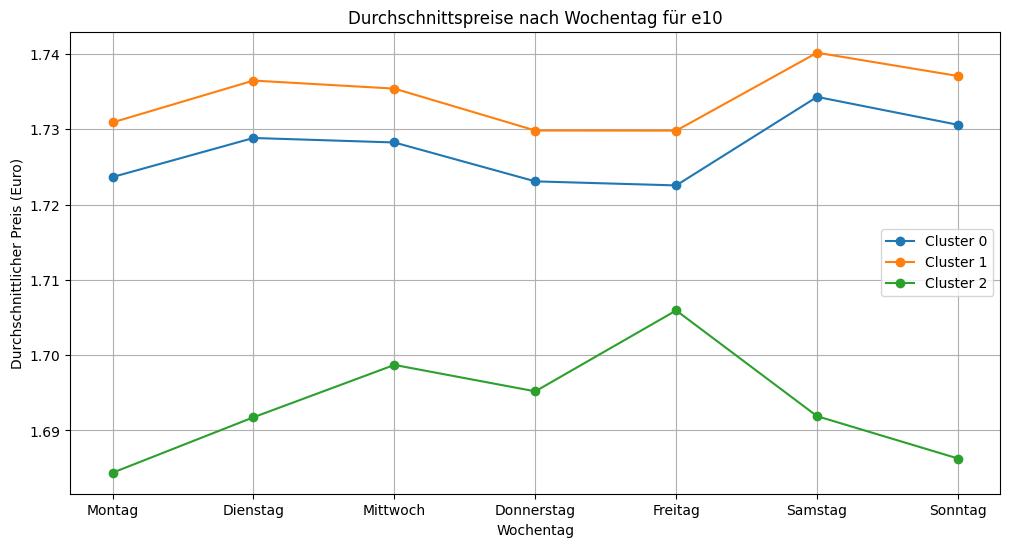

In [ ]:
import matplotlib.pyplot as plt

# Berechnung der durchschnittlichen Preise nach Wochentag und Cluster
avg_price_by_weekday_cluster = merged_with_clusters.groupby(['cluster', 'weekday'])[price_columns].mean().reset_index()

# Visualisierung der durchschnittlichen Preise nach Wochentag für Diesel, E5 und E10 in jedem Cluster
# Wochentagsnamen für die x-Achse
weekday_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

for fuel in price_columns:
    plt.figure(figsize=(12, 6))
    for cluster in avg_price_by_weekday_cluster['cluster'].unique():
        cluster_data = avg_price_by_weekday_cluster[avg_price_by_weekday_cluster['cluster'] == cluster]
        plt.plot(cluster_data['weekday'], cluster_data[fuel], marker='o', label=f'Cluster {cluster}')

    plt.title(f'Durchschnittspreise nach Wochentag für {fuel}')
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittlicher Preis (Euro)')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(7), labels=weekday_names)  # Wochentagsnamen anzeigen
    plt.show()




**Beschreibung der Diagramme: Durchschnittspreise nach Wochentag für Diesel, E5 und E10**

Die Diagramme zeigen die durchschnittlichen Preise für Diesel, E5 und E10 über die Wochentage (Montag bis Sonntag) für die drei identifizierten Cluster.

**Diesel**

**Cluster 0 (Blaue Linie):**

Preisniveau: Relativ stabil über die Woche hinweg.
Leichter Anstieg am Samstag und leichter Rückgang am Sonntag.
Cluster 1 (Orange Linie):

Preisniveau: Insgesamt höher als Cluster 0 und 2.
Höchster Preis am Samstag und ein leichter Rückgang am Sonntag.
Stabile und leicht steigende Preise über die Woche hinweg.
Cluster 2 (Grüne Linie):

Preisniveau: Am niedrigsten von allen Clustern.
Leichter Anstieg ab Mittwoch, Höhepunkt am Freitag und kontinuierlicher Rückgang am Wochenende.

**E5**

**Cluster 0 (Blaue Linie):**

Preisniveau: Relativ stabil mit einem leichten Anstieg am Samstag.
Rückgang am Sonntag.

**Cluster 1 (Orange Linie):**

Preisniveau: Insgesamt höher als Cluster 0 und 2.
Höchster Preis am Samstag und stabil bis leicht fallend am Sonntag.
Stabile Preise über die Wochentage mit leichtem Anstieg am Wochenende.

**Cluster 2 (Grüne Linie):**

Preisniveau: Am niedrigsten von allen Clustern.
Anstieg ab Montag, Höhepunkt am Freitag, danach ein kontinuierlicher Rückgang bis Sonntag.

**E10**

**Cluster 0 (Blaue Linie):**

Preisniveau: Stabil über die Woche hinweg mit einem leichten Anstieg am Samstag.
Rückgang am Sonntag.

**Cluster 1 (Orange Linie):**

Preisniveau: Insgesamt höher als Cluster 0 und 2.
Höchster Preis am Samstag, stabil bis leicht fallend am Sonntag.
Stabile Preise über die Woche mit einem leichten Anstieg am Wochenende.

**Cluster 2 (Grüne Linie):**

Preisniveau: Am niedrigsten von allen Clustern.
Anstieg ab Montag, Höhepunkt am Freitag, danach ein kontinuierlicher Rückgang bis Sonntag.

**Interpretation der Preisstrategien**

**Cluster 0**

Stabilität und moderate Anpassung:

Strategie: Konservative Preisstrategie mit Fokus auf Stabilität über die Wochentage.

Wochenende: Leichter Anstieg der Preise am Samstag, um die erhöhte Nachfrage zu nutzen, gefolgt von einem Rückgang am Sonntag.

**Cluster 1**

Aggressive Preisanpassung:

Strategie: Höhere Preisstrategie mit deutlicheren Anpassungen am Wochenende.

Wochenende: Höchster Preis am Samstag, möglicherweise um die erhöhte Nachfrage zu maximieren, gefolgt von einem leichten Rückgang am Sonntag.

Wochentage: Stabile Preise, die leicht ansteigen, um die konstante Nachfrage zu nutzen.

**Cluster 2**

Niedrigpreisstrategie:

Strategie: Preisunterbietung zur Gewinnung von Marktanteilen mit einer klaren Niedrigpreisstrategie.

Wochenende: Anstieg ab Mitte der Woche, Höhepunkt am Freitag, danach Rückgang, um möglicherweise eine hohe Nachfrage vor dem Wochenende zu nutzen.

Wochentage: Kontinuierlich niedrigere Preise mit leichten Schwankungen, die auf eine aggressive Niedrigpreisstrategie hinweisen.

**Durchschnittliche Anzahl an Preisänderungen pro Tag**

   cluster  weekday  dieselchange  e10change  e5change
0        0        0       110.000    112.125   112.375
1        0        1       106.875    109.500   109.500
2        0        2       112.625    115.500   115.500
3        0        3       107.875    106.250   106.250
4        0        4       138.250    145.500   145.250


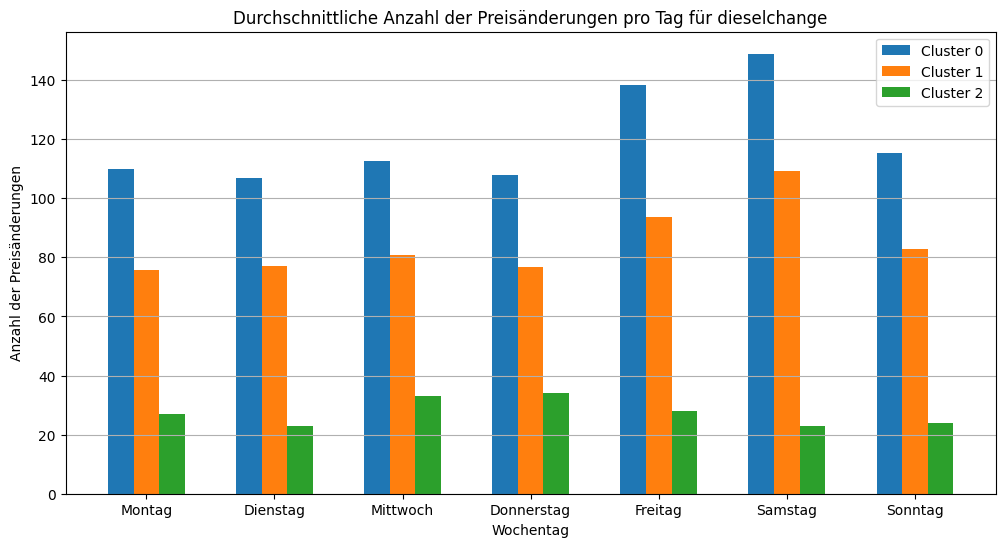

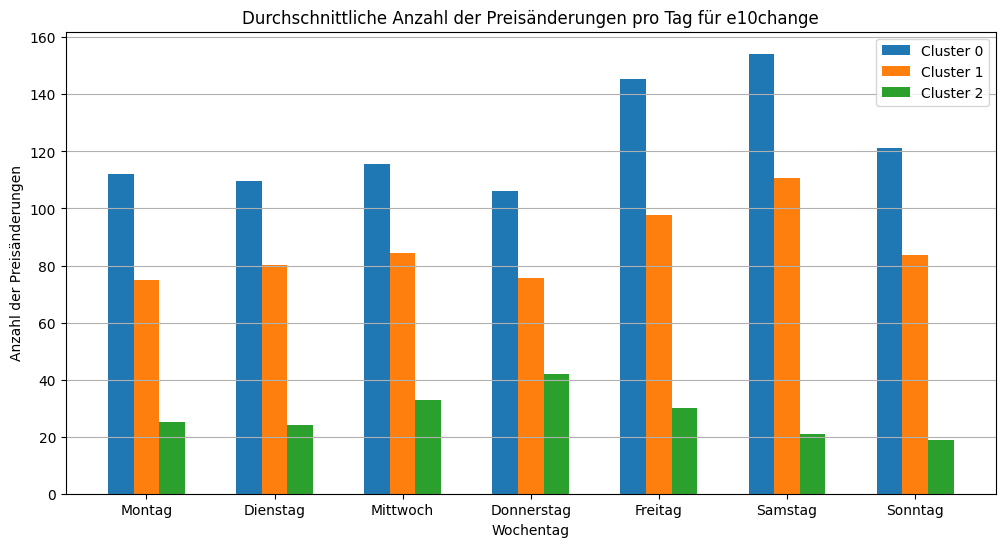

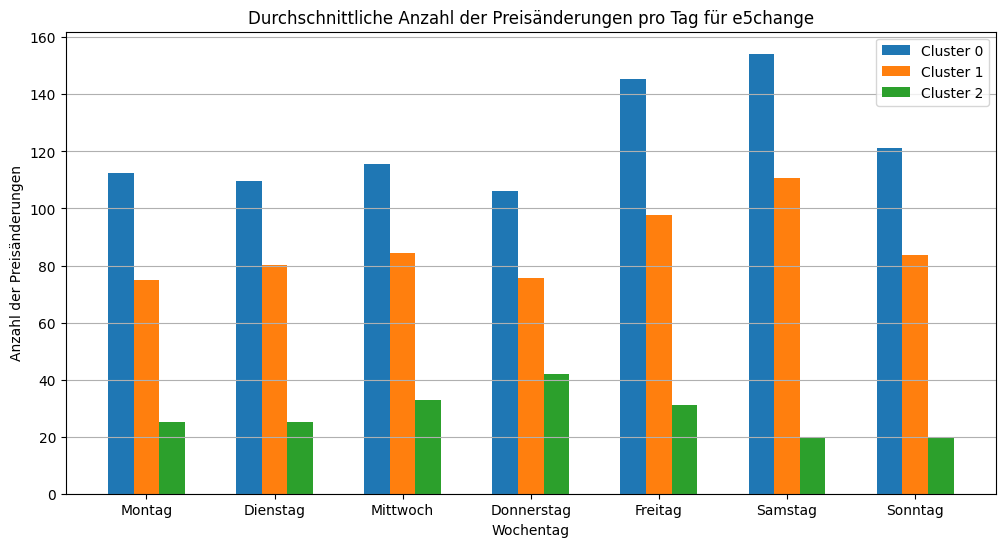

In [ ]:
# Berechnung der Summe der Preisänderungen pro Tag und Cluster
sum_changes_per_day_cluster = merged_with_clusters.groupby(['cluster', 'weekday'])[change_columns].sum().reset_index()

# Anzahl der Tankstellen pro Cluster berechnen
num_stations_per_cluster = cluster_assignments['cluster'].value_counts().sort_index()

# Durchschnittliche Anzahl der Preisänderungen pro Tag und Cluster berechnen
avg_changes_per_day_cluster = sum_changes_per_day_cluster.copy()
for cluster in avg_changes_per_day_cluster['cluster'].unique():
    avg_changes_per_day_cluster.loc[avg_changes_per_day_cluster['cluster'] == cluster, change_columns] /= num_stations_per_cluster[cluster]

# Überprüfung der Daten
print(avg_changes_per_day_cluster.head())

import matplotlib.pyplot as plt

# Visualisierung der durchschnittlichen Anzahl der Preisänderungen pro Tag für Diesel, E5 und E10 in jedem Cluster

# Wochentagsnamen für die x-Achse
weekday_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

for fuel_change in change_columns:
    plt.figure(figsize=(12, 6))
    width = 0.2  # Breite der Balken
    x = range(7)  # x-Werte für die Wochentage

    for i, cluster in enumerate(avg_changes_per_day_cluster['cluster'].unique()):
        cluster_data = avg_changes_per_day_cluster[avg_changes_per_day_cluster['cluster'] == cluster]
        plt.bar([p + width * i for p in x], cluster_data[fuel_change], width=width, label=f'Cluster {cluster}')

    plt.title(f'Durchschnittliche Anzahl der Preisänderungen pro Tag für {fuel_change}')
    plt.xlabel('Wochentag')
    plt.ylabel('Anzahl der Preisänderungen')
    plt.legend()
    plt.grid(True, axis='y')
    plt.xticks(ticks=[p + width for p in x], labels=weekday_names)  # Wochentagsnamen anzeigen
    plt.show()



Beschreibung der Diagramme: Durchschnittliche Anzahl der Preisänderungen pro Tag
Cluster 0 (Blaue Balken)

Strategie:
Tankstellen in Cluster 0 haben die höchste Anzahl an Preisänderungen.
Diesel, E5 und E10 zeigen ähnliche Muster mit etwa 120 Änderungen täglich.
Es gibt einen leichten Anstieg der Änderungen am Freitag und Samstag.
Cluster 1 (Orange Balken)

Strategie:
Tankstellen in Cluster 1 haben eine mittlere Anzahl an Preisänderungen.
Für Diesel, E5 und E10 gibt es etwa 80 Änderungen täglich.
Auch hier ist ein Anstieg der Änderungen am Freitag und Samstag zu beobachten.
Cluster 2 (Grüne Balken)

Strategie:
Tankstellen in Cluster 2 haben die geringste Anzahl an Preisänderungen.
Diesel, E5 und E10 zeigen etwa 25-30 Änderungen täglich.
Es gibt einen leichten Anstieg der Änderungen am Freitag und Samstag.
Interpretation der Preisänderungsverhalten
Cluster 0

Häufigkeit der Änderungen: Tankstellen in Cluster 0 ändern ihre Preise sehr häufig, mit rund 120 Änderungen pro Tag für alle Kraftstoffarten.

Wochenende: Die Preisänderungen nehmen am Freitag und Samstag leicht zu.
Strategische Erkenntnis: Die hohe Frequenz der Preisänderungen deutet auf eine Strategie hin, die stark auf Markt- und Wettbewerbsbedingungen reagiert. Diese Tankstellen versuchen, kontinuierlich wettbewerbsfähig zu bleiben und Marktanteile durch häufige Anpassungen zu sichern.

Cluster 1

Häufigkeit der Änderungen: Tankstellen in Cluster 1 ändern ihre Preise mäßig häufig, mit etwa 80 Änderungen pro Tag für alle Kraftstoffarten.

Wochenende: Es gibt einen merklichen Anstieg der Preisänderungen am Freitag und Samstag.

Strategische Erkenntnis: Diese Tankstellen reagieren ebenfalls auf Marktdynamiken, insbesondere am Wochenende. Die Strategie könnte darauf abzielen, die Nachfrage zu maximieren und den Umsatz in Spitzenzeiten zu erhöhen.

Cluster 2

Häufigkeit der Änderungen: Tankstellen in Cluster 2 ändern ihre Preise am wenigsten, mit etwa 25-30 Änderungen pro Tag für alle Kraftstoffarten.

Wochenende: Auch hier gibt es einen leichten Anstieg der Änderungen am Freitag und Samstag.

Strategische Erkenntnis: Diese Tankstellen verfolgen eine stabilere und weniger reaktive Preisstrategie. Dies könnte auf eine langfristige Preiskonsistenz abzielen, möglicherweise um Stammkunden anzuziehen und zu halten.

Allgemeine Beobachtungen

Gemeinsamkeiten: Alle Cluster zeigen einen Anstieg der Preisänderungen am Freitag und Samstag, was auf eine Anpassung an die erhöhte Nachfrage am Wochenende hinweist.

Unterschiede: Cluster 0 zeigt die aggressivste und flexibelste Preisstrategie, gefolgt von Cluster 1 und Cluster 2, die eine stabilere und weniger reaktive Strategie verfolgen.

Schlussfolgerungen und Empfehlungen

Cluster 0: Diese Tankstellen sollten ihre Strategie der häufigen Preisänderungen beibehalten, könnten jedoch die Auswirkungen dieser Änderungen auf die Nachfrage und den Umsatz weiter analysieren.

Cluster 1: Diese Tankstellen sollten die Reaktion auf den Wochenendverkehr weiter optimieren und möglicherweise gezieltere Preisänderungen während der Woche einführen.

Cluster 2: Diese Tankstellen könnten von einer genaueren Analyse der Marktschwankungen profitieren und gezieltere Preisänderungen einführen, um wettbewerbsfähiger zu werden.

 **Durchschnittliche Höhe der Preisänderungen**

   cluster  avg_diesel_increase  avg_diesel_decrease  avg_e5_increase  \
0        0             0.040371            -0.022879         0.039696   
1        1             0.051319            -0.032288         0.049540   
2        2             0.059296            -0.035417         0.056014   

   avg_e5_decrease  avg_e10_increase  avg_e10_decrease  
0        -0.020822          0.039705         -0.020827  
1        -0.030745          0.049540         -0.030749  
2        -0.034336          0.049861         -0.030496  


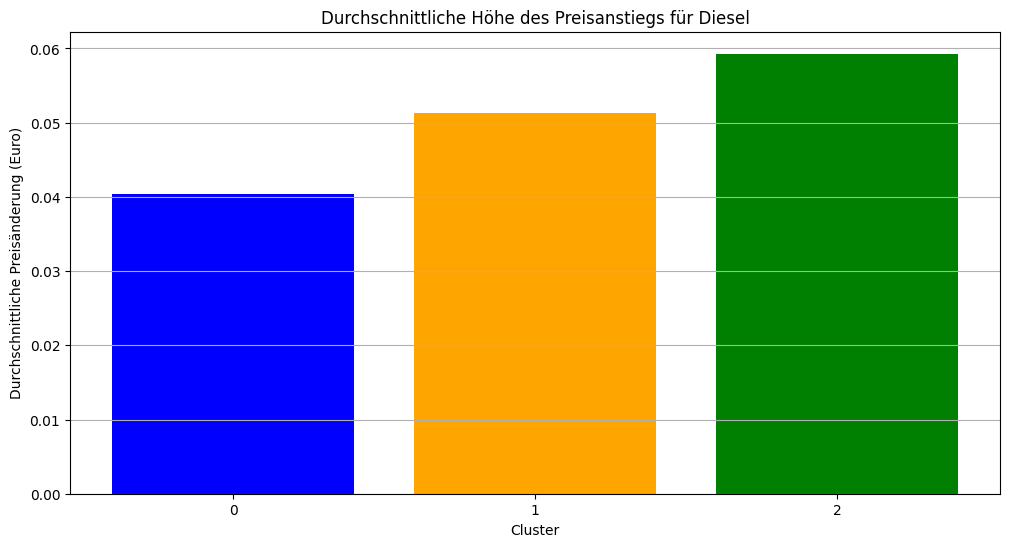

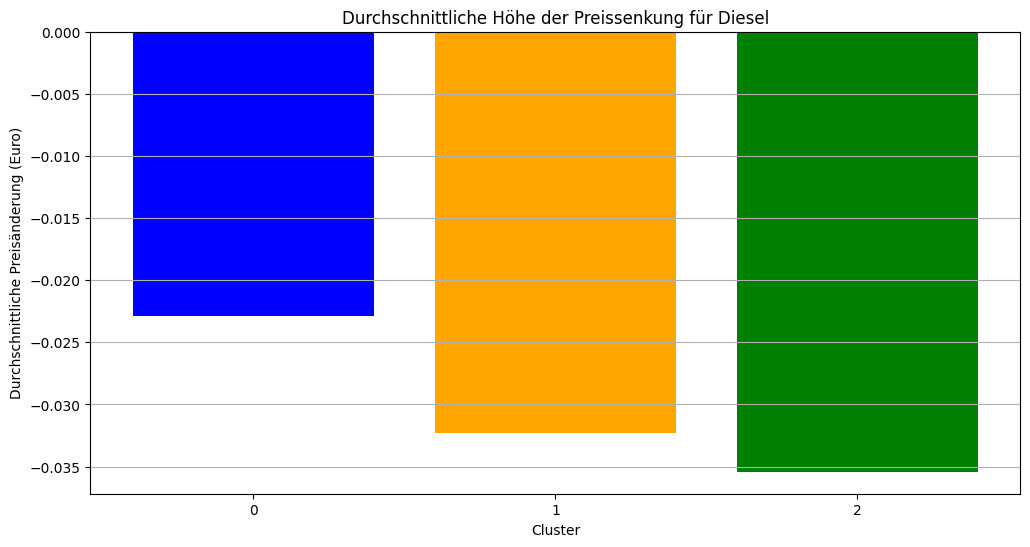

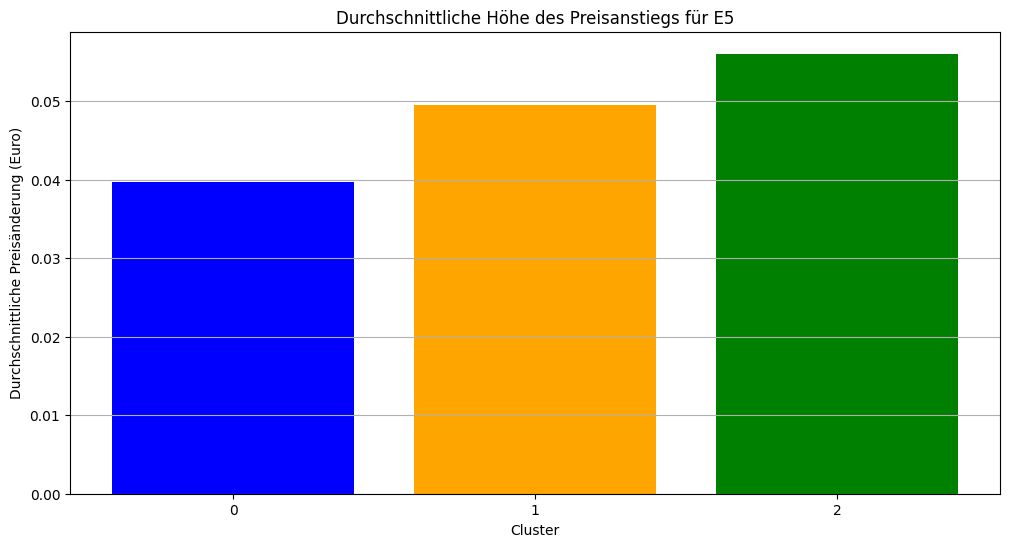

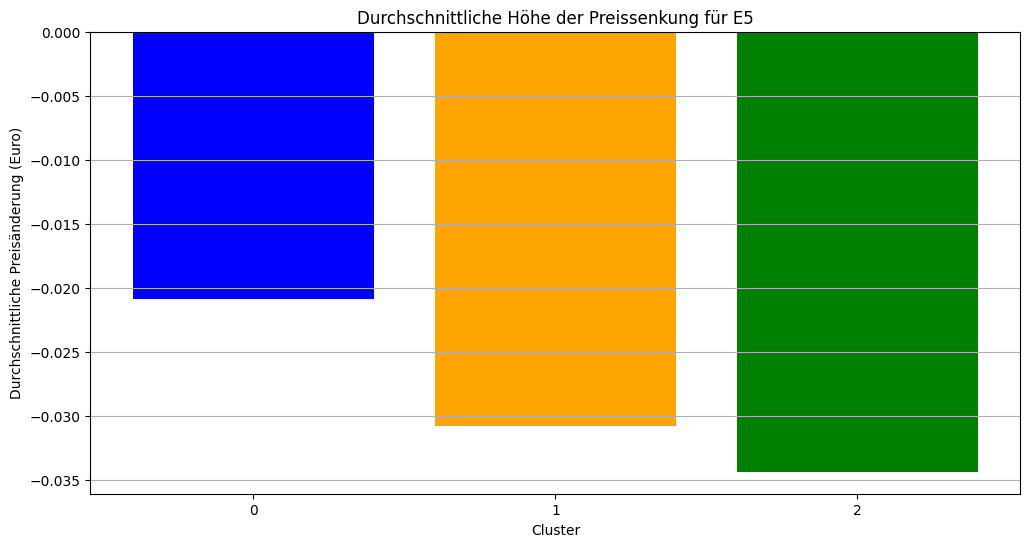

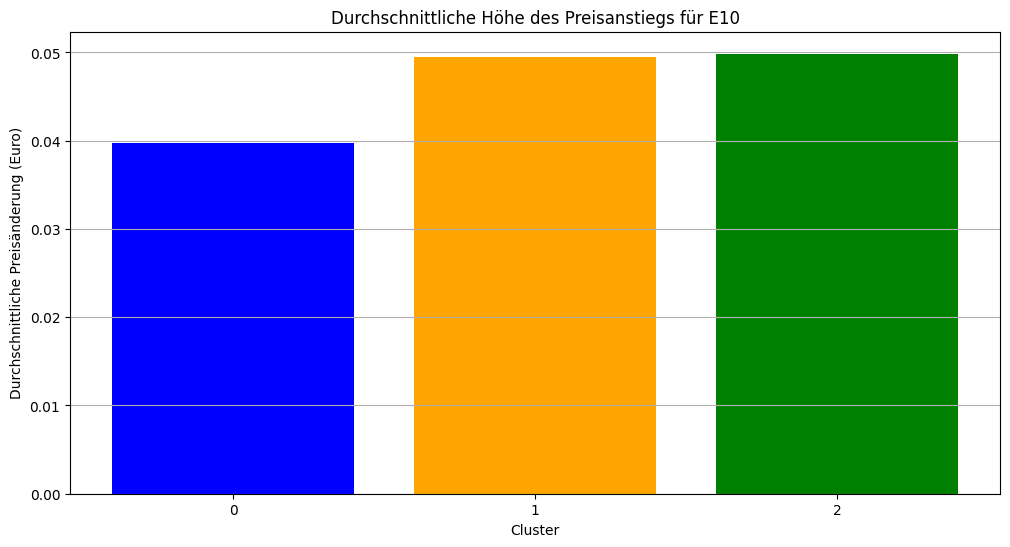

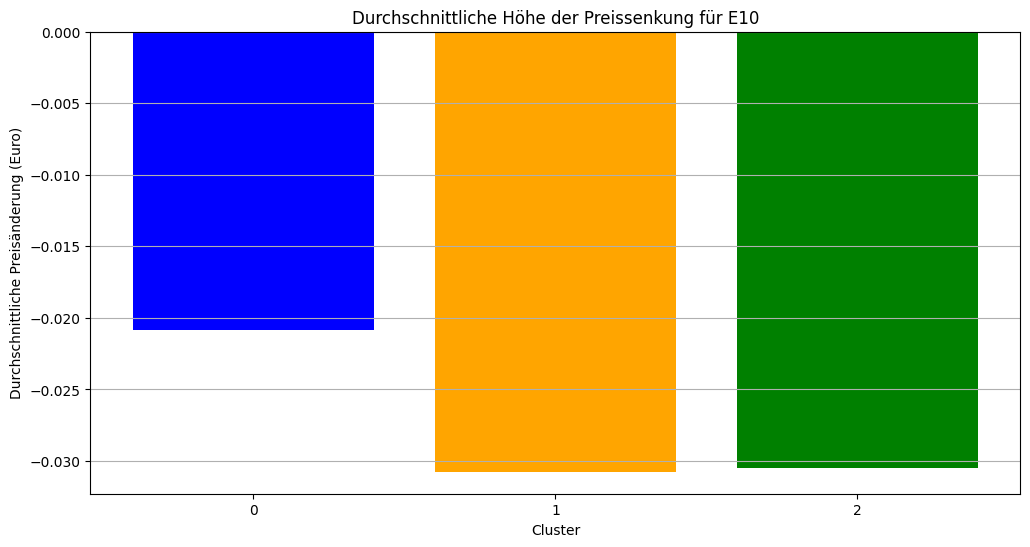

In [63]:
# Berechnung der durchschnittlichen Höhe der Erhöhungen und Senkungen pro Cluster
avg_increase_decrease_cluster = merged_with_clusters.groupby('cluster').apply(
    lambda df: pd.Series({
        'avg_diesel_increase': df.loc[df['diesel_change_value'] > 0, 'diesel_change_value'].mean(),
        'avg_diesel_decrease': df.loc[df['diesel_change_value'] < 0, 'diesel_change_value'].mean(),
        'avg_e5_increase': df.loc[df['e5_change_value'] > 0, 'e5_change_value'].mean(),
        'avg_e5_decrease': df.loc[df['e5_change_value'] < 0, 'e5_change_value'].mean(),
        'avg_e10_increase': df.loc[df['e10_change_value'] > 0, 'e10_change_value'].mean(),
        'avg_e10_decrease': df.loc[df['e10_change_value'] < 0, 'e10_change_value'].mean()
    })
).reset_index()

# Überprüfung der Daten
print(avg_increase_decrease_cluster)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Visualisierung der durchschnittlichen Höhe der Preisänderungen für Diesel, E5 und E10 in jedem Cluster
change_types = {
    'avg_diesel_increase': 'Durchschnittliche Höhe des Preisanstiegs für Diesel',
    'avg_diesel_decrease': 'Durchschnittliche Höhe der Preissenkung für Diesel',
    'avg_e5_increase': 'Durchschnittliche Höhe des Preisanstiegs für E5',
    'avg_e5_decrease': 'Durchschnittliche Höhe der Preissenkung für E5',
    'avg_e10_increase': 'Durchschnittliche Höhe des Preisanstiegs für E10',
    'avg_e10_decrease': 'Durchschnittliche Höhe der Preissenkung für E10'
}

for change_type, title in change_types.items():
    plt.figure(figsize=(12, 6))
    plt.bar(avg_increase_decrease_cluster['cluster'], avg_increase_decrease_cluster[change_type], color=['blue', 'orange', 'green'])
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Durchschnittliche Preisänderung (Euro)')
    plt.xticks(avg_increase_decrease_cluster['cluster'])
    plt.grid(True, axis='y')
    plt.show()


**Hauptkomponentenanalyse**

**Identifikation der Wettbewerber aus den Clustern**

In [ ]:
# Cluster-Zuweisungen für jede Tankstelle
labels = kmeans.labels_

# Erstellen eines DataFrames mit den Cluster-Zuweisungen
cluster_assignments = pd.DataFrame({
    'station_uuid': features_df.index,
    'cluster': labels
})

# Ausgabe der Cluster-Zuweisungen
print(cluster_assignments)

             station_uuid  cluster
0           Access_Calwer        1
1             Aral_Armsel        1
2    Aral_KaiserFriedrich        1
3         Aral_Karlsruher        1
4         Aral_Lochaecker        1
5               BFT_Haupt        0
6            ENI_Hirsauer        0
7          ENI_Karlsruher        0
8             Esso_Calwer        0
9    Esso_KaiserFriedrich        0
10         JET_Karlsruher        0
11             JET_Luisen        1
12   MastOehlert_Blaecher        0
13            SB_Eutinger        1
14        Shell_Buchbusch        0
15     Shell_Wilferdinger        1
16        Shell_Zerrenner        1
17         TP_Braetzingen        2
18  Tankcenter_Wurmberger        1
19        Total_Breslauer        1


# Auswahl und Beschreibung der direkten Wettbewerber auf Basis der Clusteranalyse und geografischen Faktoren

**Interpretation der Cluster anahnd der Clusterzentren**

**Auswahl der direkten Wettbewerber**

Die Auswahl der direkten Wettbewerber erfolgt zum einen anhand der Ergebnisse aus der Clusteranalyse sowie aus der geografischen Lage innerhalb Pforzheims.

Die von uns ausgewählte Tankstelle "Aral_Lochaecker" wurde Cluster 1 zugeordnet. In diesem Cluster befinden sich folgende zehn Wettbewerber, die ähnliche Preisstrategien aufweisen und daher zum erweiterten Wettbewerbskreis zu zählen sind:

* Access_Calwer
* Aral_Armsel
* Aral_KaiserFriedrich
* Aral_Karlsruher
* Jet_Luisen
* SB_Eutinger
* Shell_Wilferdinger
* Shell_Zerrener
* Tankcenter_Wurmberger
* Total_Breslauer

Dennoch spielt die Lage einer Tankstelle ebenfalls eine entscheidende Rolle für ihre Preisstrategie. Daher haben wir uns neben der Clusterzugehörigkeit hauptsächlich auf Tankstellen konzentriert, die eine ähnliche geografische Lage wie die Aral Tankstelle in der Lochäcker Straße haben.

Die Lage der Aral Lochäcker lässt sich folgendermaßen beschreiben:

* An einer großen Bundesstraße (B294)
* Nahe der Autobahnauffart (Pf-Ost)
* Außerhalb der Innenstadt
* Im Gewerbegebiet gelegen

Als Wettbewerber haben wir weitere Tankstellen in Pforzheim identifiziert, die ähnliche Lageparameter aufweisen. Nachfolgend werden die Wettbewerber, ihre geografische Lage sowie ihr Cluster aufgeführt:

Shell_Buchbusch:
* An einer großen Bundesstraße (B294)
* Nahe der Autobahnauffart (Pf-Ost, nur auf der anderen Seite als die Aral_Lochäcker)
* Außerhalb der Innenstadt
* Im Gewerbegebiet gelegen
* Cluster: 0

Eni_Karlsruher, Jet_Karlsruher, Aral_Karlsruher:
* An einer großen Bundesstraße (B10)
* Nahe der Autobahnauffart (Pf-West)
* Außerhalb der Innenstadt
* Im Gewerbegebiet gelegen
* Cluster Eni & Jet: 0, Cluster Aral: 1


Somit haben wir insgesamt anhand der Lage 4 Wettbewerber identifiziert, wovon ein Wettbewerber ins selbe Cluster fällt wie die von uns gewählt Tankstelle und der Rest in Cluster 0 eingeordnet werden kann.




# Data cleansing and preprocessing für R

**Filtern nach Tankstellen in Pforzheim:**

In [ ]:
# Filtern des Datensatzes nach den IDs in ids_pf
data = raw_data[raw_data['station_uuid'].isin(ids_pf)]

In [ ]:
data.head()

**Umwandlung des Datums zur Vorbereitung der Umcodierung des Datensatzes:**
* Datumsspalte in Datumsformat umwandeln
* Zeitzone anpassen (die bisherige Zeitzone war UTC)
* Zeitzone entfernen (da alle untersuchten in derselben Zeitzone sind)
* Datum als Index setzen (erleichtert den Zugriff und somit die geplante Umwandlung)
* Index auf nächste volle Minute runden (um die Daten zu vereinheitlichen)



In [ ]:
# Step 1: Parse the 'date' column to datetime, assuming it's already timezone-aware
data['date'] = pd.to_datetime(data['date'])

# Convert to 'Europe/Berlin' timezone and then remove the timezone information
data['date'] = data['date'].dt.tz_convert('Europe/Berlin').dt.tz_localize(None)

data.set_index('date', inplace=True)

data.index = data.index.round('T')  # 'T' represents minute frequency


**Erstellung eines neuen Dataframes für die umgewandelten Daten:**
* Das neue Dataframe enthält einen Datums- und Zeitindex für jede Minute innerhalb des Untersuchunszeitraums
* Dieses Vorgehen ermöglicht konsistente Analysen

In [ ]:
# Step 2: Create a new DataFrame with a datetime index for every minute
start_date = data.index.min()
end_date = data.index.max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='T')  # 'T' for minute frequency
df = pd.DataFrame(index=all_dates)

**Füllung des neuen Dataframes mit Daten:**
* In temporären Dataframes werden die Daten aus dem ursprünglichen Dateframe übernommen (also nur immer wenn sich der Preis geändert hat): Dabei gibt es ein temporäres Dateframe für jede Kombination aus Tankstelle und Kraftstoffart. Die Kombination wird durch den neuen Spaltentitel reflektiert, sodass die Daten im Nachhinein gut fusioniert werden können.
* Es werden Duplikate im Index des temporären Dataframes gelöscht, um sicherzustellen, dass jeder Zeitpunkt einzigarti ist.
* Die temporären Dataframes werden neu indiziert, um mit dem Index des gewünschten Dataframes df übereinzustimmen. Fehlende Werte werden "vorwärts gefüllt", d.h. der letzte bekannte Preis wird übernommen bei NA-Werten.
* Die Dataframes werden mit dem gewünschten Dataframe fusioniert

In [ ]:
# Step 3: Expand dataset for each station and fuel type
# Create columns for each station and fuel type
for station in data['station_uuid'].unique():
    for fuel_type in ['diesel', 'e5', 'e10']:
        # Create a temporary DataFrame for each station and fuel type
        temp_data = data[(data['station_uuid'] == station) & (data[f"{fuel_type}change"] == 1)]
        temp_data = temp_data[[fuel_type]].rename(columns={fuel_type: f"{station}_{fuel_type}"})

        # Ensure there's no duplicate index before reindexing
        temp_data = temp_data[~temp_data.index.duplicated(keep='first')]

        # Reindex the temp_data to match 'df', forward filling the missing values
        temp_data_reindexed = temp_data.reindex(df.index, method='ffill')

        # Join the reindexed data with 'df'
        df = df.join(temp_data_reindexed, how='left')

**Auffüllen der Preise:**
Dieser Code füllt fehlende Preisdaten im DataFrame df vorwärts auf.

Begründung:
Nachdem die temporären Dataframes mit dem gewünschten Dataframe zusammengeführt wurden, können weiterhin fehlende Werte auftreten. Dies liegt daran, dass nicht alle Tankstellen zu jedem Zeitpunkt Preisdaten für jeden Kraftstofftyp haben. Die Zusammenführung fügt neue Spalten zu df hinzu, aber für Zeiten, zu denen keine Preisdaten für eine bestimmte Tankstelle vorhanden waren, bleiben die Werte in diesen neuen Spalten leer.

In [ ]:
# Step 4: Forward fill the prices
df.ffill(inplace=True)

In [ ]:
df.head()

**Datum als Spalte speichern um Datentransfer zu R zu vereinfachen:**

In [ ]:
df.reset_index(inplace=True, drop=False)  # 'drop=False' ensures the index is added as a column, not discarded

In [ ]:
# Assuming you've already converted the index to a column using reset_index
df = df.rename(columns={'index': 'date'})

**Aus dem Datum die Stunde, den wochentag und die Minute extrahieren:**

In [ ]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday
df['minute'] = df['date'].dt.minute

**Spalten umbenennen damit sie besser lesbar sind:**

In [ ]:
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Function to apply the mapping to column names
def rename_columns(column_name):
    for uuid in station_names.keys():
        if uuid in column_name:
            # Replace UUID with a placeholder or a specific name if provided
            new_name = station_names[uuid]
            return column_name.replace(uuid, new_name if new_name else "StationNamePlaceholder")
    return column_name

# Rename the columns based on the mapping
df.columns = [rename_columns(col) for col in df.columns]

In [ ]:
df.head(10000)

# Deskriptive Statistik

Berechnung von deskriptiven Statistiken und Boxplott Preise nach Kraftstoffart, Stunde und Wochentag für unsere Aral

In [ ]:
# 2. Durchschnittliche Preise nach Stunde
average_prices_hour = df.groupby('hour').mean()

# 3. Durchschnittliche Preise nach Wochentag
average_prices_weekday = df.groupby('weekday').mean()

# 4. Standardabweichung der Preise nach Stunde
std_prices_hour = df.groupby('hour').std()

# 5. Standardabweichung der Preise nach Wochentag
std_prices_weekday = df.groupby('weekday').std()

# 6. Anzahl der Preisänderungen
price_changes = df.diff().apply(lambda x: (x != 0).sum())

# 7. Minimale und maximale Preise nach Stunde
min_prices_hour = df.groupby('hour').min()
max_prices_hour = df.groupby('hour').max()

# 8. Minimale und maximale Preise nach Wochentag
min_prices_weekday = df.groupby('weekday').min()
max_prices_weekday = df.groupby('weekday').max()

# 9. Visualisierungen
# Boxplot der Preise nach Kraftstoffart
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10']])
plt.title('Boxplot der Preise nach Kraftstoffart')
plt.show()


# Boxplot der Preise nach Stunde
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Aral_Lochaecker_e5', data=df)
plt.title('Boxplot der Dieselpreise nach Stunde')
plt.show()

# Boxplot der Preise nach Wochentag
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='Aral_Lochaecker_e5', data=df)
plt.title('Boxplot der Dieselpreise nach Wochentag')
plt.show()


Konkretisierung des Wettbewerbs auf 4 Tankstellen im Umkreis der Aral Lochäcker

In [ ]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_columns = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10',
    'JET_Luisen_diesel', 'JET_Luisen_e5', 'JET_Luisen_e10',
    'SB_Eutinger_diesel', 'SB_Eutinger_e5', 'SB_Eutinger_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_df = df[WBW_columns]

# Anzeigen der ersten paar Zeilen des neuen DataFrames
WBW_df.head()


Plotten der Preise im Zeitverlauf für den engeren Wettbewerberkreis, getrennt nach Kraftstoffart

In [ ]:
# Plot für Dieselpreise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)
plt.title('Dieselpreise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E5 Preise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)
plt.title('E5 Preise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E10 Preise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)
plt.title('E10 Preise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Konkretisierung des Bertachtungszeitraums auf einen bestimmten Tag

In [ ]:
# Sicherstellen, dass das Datumsformat korrekt ist
WBW_df['date'] = pd.to_datetime(WBW_df['date'])

# Datumsauswahl
selected_date = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df = WBW_df[WBW_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df.head()

Plotten der Preise für den ausgewählten Tag inklusive ANzeige des Durchschnitts und der Standardabweichung für diesen Tag

In [ ]:
# Berechnung der durchschnittlichen Preise und Standardabweichungen für den ausgewählten Tag
mean_prices = filtered_df.mean()
std_prices = filtered_df.std()

# Plot für Dieselpreise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)

# Annotationen für Dieselpreise
for station in ['Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel', 'JET_Luisen_diesel', 'SB_Eutinger_diesel']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('Dieselpreise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E5 Preise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)

# Annotationen für E5 Preise
for station in ['Shell_Buchbusch_e5', 'Aral_Lochaecker_e5', 'JET_Luisen_e5', 'SB_Eutinger_e5']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('E5 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E10 Preise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)

# Annotationen für E10 Preise
for station in ['Shell_Buchbusch_e10', 'Aral_Lochaecker_e10', 'JET_Luisen_e10', 'SB_Eutinger_e10']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('E10 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Heatmap
**Erstellung einer Heatmap**

In [ ]:
# Gruppierung nach Stunde und Berechnung des Durchschnittspreises
hourly_avg_prices = filtered_df.groupby('hour').mean()

# Anzeigen der stündlichen Durchschnittspreise
hourly_avg_prices.head()

import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der zu visualisierenden Spalten
heatmap_data = hourly_avg_prices[[
    'Aral_Lochaecker_diesel','Shell_Buchbusch_diesel',  'JET_Luisen_diesel', 'SB_Eutinger_diesel',
    'Aral_Lochaecker_e10','Shell_Buchbusch_e10','JET_Luisen_e10','SB_Eutinger_e10',
    'Aral_Lochaecker_e5','Shell_Buchbusch_e5',  'JET_Luisen_e5', 'SB_Eutinger_e5'
]]

# Erstellung der Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Stündliche Durchschnittspreise am 2024-05-30')
plt.xlabel('Stunde')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

Festlegung der Shell Buchbusch als Hauptkonkurrent

In [ ]:
WBW_core_columns = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core = WBW_df[WBW_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df_core.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum und die spezifische Stunde filtern
filtered_df_core = WBW_core_df[(WBW_core_df['date'].dt.date == pd.to_datetime(selected_date_core).date()) &
                               (WBW_core_df['hour'] >= 7) &
                               (WBW_core_df['hour'] < 10)]

# Pivot-Tabelle erstellen, um die Daten für die Heatmap vorzubereiten
heatmap_data_core = filtered_df_core.pivot(index='minute', columns='hour',
                                           values=[
                                               'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
                                               'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
                                           ]).T

# Erstellung der Heatmap
plt.figure(figsize=(100, 10))
sns.heatmap(heatmap_data_core, cmap='viridis', annot=True, fmt=".2f")
plt.title('Preise pro Minute von 7-8 Uhr am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum und den spezifischen Zeitintervall filtern
filtered_df_core = WBW_core_df[(WBW_core_df['date'].dt.date == pd.to_datetime(selected_date_core).date()) &
                               (WBW_core_df['hour'] >= 6) &
                               (WBW_core_df['hour'] < 10)]

# Vorbereitung der Daten für die Heatmap
filtered_df_core.set_index(['hour', 'minute'], inplace=True)

# Pivot-Tabelle erstellen, um die Daten für die Heatmap vorzubereiten
heatmap_data_core = filtered_df_core.pivot_table(index=['hour', 'minute'],
                                                 values=[
                                                     'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
                                                     'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
                                                 ]).T

# Erstellung der Heatmap
plt.figure(figsize=(50, 10))
sns.heatmap(heatmap_data_core, cmap='viridis', annot=True, fmt=".2f")
plt.title('Preise pro Minute von 6-11 Uhr am 2024-05-30')
plt.xlabel('Stunde und Minute')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

In [ ]:
WBW_core_columns_diesel = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df_core_diesel.head()

In [ ]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns_diesel = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()]

# Differenzspalten hinzufügen
filtered_df_core_diesel['shell_dif'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff()
filtered_df_core_diesel['aral_dif'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff()

# Anzeigen der gefilterten Daten mit den Differenzspalten
print(filtered_df_core_diesel)

In [ ]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns_diesel = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Aral_diesel-shell_diesel'] = (filtered_df_core_diesel['Aral_Lochaecker_diesel'] - filtered_df_core_diesel['Shell_Buchbusch_diesel']) * 100  # in Cent
filtered_df_core_diesel['Preisänderungin%'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].pct_change() * 100  # Prozentuale Preisänderung
filtered_df_core_diesel['Preisänderung'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff()  # Absolute Preisänderung

# Delta Zeiten der Preisänderungen berechnen
filtered_df_core_diesel['Delta_zeitenpreisänderung'] = filtered_df_core_diesel['date'].diff().apply(lambda x: x.total_seconds() / 60 if pd.notnull(x) else 0)

# Zeit bis zur nächsten Änderung berechnen
filtered_df_core_diesel['ZeitnächsteÄnderung'] = filtered_df_core_diesel['Delta_zeitenpreisänderung'].shift(-1)

# Vergleich der prozentualen Preisänderungen bei Änderung (Aral vs. Shell)
filtered_df_core_diesel['VergleichbeiderProzentePReisbeiÄnderung'] = filtered_df_core_diesel['Preisänderungin%'] - filtered_df_core_diesel['Shell_Buchbusch_diesel'].pct_change() * 100

# Anzeigen der gefilterten Daten mit den neuen Spalten
filtered_df_core_diesel.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                               (WBW_core_df_diesel['hour'] >= 0) &
                               (WBW_core_df_diesel['hour'] < 24)]



# Differenzspalte hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent

# Vorbereitung der Daten für die Heatmap
filtered_df_core_diesel_pivot = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_aral_diesel_min2-1')

# Erstellung der Heatmap
plt.figure(figsize=(500, 20))
sns.heatmap(filtered_df_core_diesel_pivot, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Aral Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                                             (WBW_core_df_diesel['hour'] >= 6) &
                                             (WBW_core_df_diesel['hour'] < 10)]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff() * 100  # in Cent

# Differenz zwischen den Preisänderungen von Aral und Shell
filtered_df_core_diesel['Differenz_Aral_Shell'] = filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] - filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1']

# Vorbereitung der Daten für die Heatmap
filtered_df_core_diesel_pivot = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_Aral_Shell')

# Erstellung der Heatmap
plt.figure(figsize=(50, 8))
sns.heatmap(filtered_df_core_diesel_pivot, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Preisänderungen zwischen Aral und Shell pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                                             (WBW_core_df_diesel['hour'] >= 0) &
                                             (WBW_core_df_diesel['hour'] < 10)]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff() * 100  # in Cent

# Absolute Differenz zwischen den Preisen von Aral und Shell
filtered_df_core_diesel['Absolute_Differenz_Aral_Shell'] = (filtered_df_core_diesel['Aral_Lochaecker_diesel'] - filtered_df_core_diesel['Shell_Buchbusch_diesel']) * 100  # in Cent

# Vorbereitung der Daten für die Heatmaps
pivot_aral = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_aral_diesel_min2-1')
pivot_shell = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_shell_diesel_min2-1')
pivot_abs_diff = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Absolute_Differenz_Aral_Shell')

# Erstellung der Heatmaps
plt.figure(figsize=(300, 50))

plt.subplot(3, 1, 1)
sns.heatmap(pivot_aral, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Aral Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.subplot(3, 1, 2)
sns.heatmap(pivot_shell, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Shell Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.subplot(3, 1, 3)
sns.heatmap(pivot_abs_diff, cmap='viridis', annot=True, fmt=".2f")
plt.title('Absolute Differenz der Preise zwischen Aral und Shell pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.tight_layout()
plt.show()